In [1]:
import sys
sys.executable 

'C:\\Users\\jakob\\Anaconda3\\python.exe'

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np
sns.set_style('dark')
sns.set_context('paper')
import scipy.stats as stats
import math
import csv

import pyNetLogo
from cmcrameri import cm

## pyNetLogo

In [ ]:
import timeit

In [4]:
netlogo = pyNetLogo.NetLogoLink(gui=True)
netlogo.load_model('../Model.nlogo')

FileNotFoundError: 

In [ ]:
netlogo.command('setup')

In [ ]:
import time
start_time = time.time()
netlogo.repeat_command("go", 100)
print("--- %s seconds ---" % (time.time() - start_time))

In [5]:
netlogo.kill_workspace()

In [ ]:
coor = netlogo.patch_report('fee')
coor = coor.to_numpy()

In [ ]:
coor[np.where(coor > 0)] = 0

In [ ]:
netlogo.report('num-cars')

In [ ]:
colors = netlogo.patch_report('pcolor')
fees = netlogo.patch_report('fee')
lot_colors = netlogo.report("lot-colors")

In [ ]:
lot_masks = dict()
for i, c in enumerate(['yellow', 'orange', 'green', 'blue']):
    lot_masks[c] = colors == lot_colors[i]

In [ ]:
pd.set_option('display.max_rows', 91)
pd.set_option('display.max_columns', 91)
fees[lot_masks['yellow']]= fees[lot_masks['yellow']] + 1

In [ ]:
netlogo.patch_set("fee", fees)

In [ ]:
temporal_resolution = netlogo.report("temporal-resolution")

In [ ]:
temporal_resolution

In [ ]:
pd.set_option('display.max_rows', 91)
pd.set_option('display.max_columns', 91)

fees[colors==lot_colors[1]]

In [ ]:
np.unique(fees[colors==lot_color[1]].to_numpy()[~np.isnan(fees[colors==lot_color[1]].to_numpy())])

In [ ]:
fees[colors==lot_color[1]].value_counts()

In [ ]:
netlogo.patch_set("pcolor", colors.mask(colors==lot_color[0], lot_color[3]))

In [ ]:
coor.to_numpy()

## Error Analysis

In [3]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


def get_and_plot(episode_path):
    """
    """
    #color_list = ['#e6194B', '#f58231', '#aaffc3', '#469990']
    color_list = [cm.imola_r(0), cm.imola_r(1.0 * 1/3), cm.imola_r(1.0 * 2/3), cm.imola_r(1.0)]
    capacity_i = 0
    fee_i = 0
    with open(episode_path, newline='') as csvfile:
        file_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for i, row in enumerate(file_reader):
            if '"Utilized Capacity at Different Lots"' in row:
                capacity_i = i
            elif '"Dynamic Fee of Different Lots"' in row:
                fee_i = i
    
    fee_df = pd.read_csv(episode_path, skiprows=fee_i + 11, nrows=21601)
    fee_df = fee_df.rename(columns={"y": "yellow_lot_fee", "y.1": "orange_lot_fee", "y.2" : "green_lot_fee", "y.3" : "blue_lot_fee"})
    fee_df.x = fee_df.x / 1800
    
    occup_df = pd.read_csv(episode_path, skiprows=capacity_i + 12, nrows=21601)
    occup_df = occup_df.rename(columns={"y": "blue_lot_occup", "y.1": "yellow_lot_occup", "y.2" : "green_lot_occup", "y.3" : "orange_lot_occup"})
    occup_df.x = occup_df.x / 1800

    
    fig, axs = plt.subplots(2, 1, figsize=(20, 15))
    axs[0].plot(fee_df.x, fee_df.yellow_lot_fee, linewidth=4, color=color_list[0])
    axs[0].plot(fee_df.x, fee_df.orange_lot_fee, linewidth=4, color=color_list[1])
    axs[0].plot(fee_df.x, fee_df.green_lot_fee, linewidth=4, color=color_list[2])
    axs[0].plot(fee_df.x, fee_df.blue_lot_fee, linewidth=4, color=color_list[3])

        # plt.xticks(fontsize=15)
    axs[0].set_ylabel('Hourly Fee in €', fontsize=30)
    axs[0].set_xlabel('Time in hours', fontsize=30)
    axs[0].grid(True)
    axs[0].tick_params(axis='both', labelsize=25) 

    
    axs[1].plot(occup_df.x, occup_df.yellow_lot_occup, linewidth=2, color=color_list[0])
    axs[1].plot(occup_df.x, occup_df.orange_lot_occup, linewidth=2, color=color_list[1])
    axs[1].plot(occup_df.x, occup_df.green_lot_occup, linewidth=2, color=color_list[2])
    axs[1].plot(occup_df.x, occup_df.blue_lot_occup, linewidth=2, color=color_list[3])
    axs[1].plot(occup_df.x, [75] * len(occup_df.x), linewidth=2, color="red", linestyle='dashed')
    axs[1].plot(occup_df.x, [90] * len(occup_df.x), linewidth=2, color="red", linestyle='dashed')

    # plt.xticks(fontsize=15)
    axs[1].set_ylabel('Occupancy', fontsize=30)
    axs[1].set_xlabel('Time of Day', fontsize=30)
    axs[1].grid(True)
    axs[1].tick_params(axis='both', labelsize=25) 
    
    axs[1].set_xticks(ticks=np.arange(0, max(fee_df["x"])+1, 2))
    axs[1].set_xticklabels(labels=[f"{int(x+8)}:00" for x in np.arange(0, max(fee_df["x"])+1, 2)])

    
    cmap = cm.imola

    
    fig.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.8,
                    wspace=0.02, hspace=0.02)
    cb_ax = fig.add_axes([0.83, 0.1, 0.02, 0.8])

    
    bounds = [0, 1, 2, 3, 4]
    norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
    cbar = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cb_ax, orientation='vertical')
    
    cbar_1 = fig.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=cb_ax, orientation='vertical')


    #cbar.ax.set_yticklabels(['Centre', 'Periphery'], fontsize=22)  # vertically oriented colorbar
    cbar.set_ticks([])
    cbar.ax.set_ylabel( r"$\Leftarrow$ Distance to City Centre", fontsize=25, loc="top")
    #cb_ax_copy = cbar.ax.twinx()
    #cbar_1.ax.set_ylabel( r"Centre", fontsize=25, loc="top")

In [4]:
def old_reward(x):
    """
    """
    if 75 < x < 90:
        return 500
    elif x <= 75:
            return -((x - 75) ** 2)
    elif x >= 90:
        return -((x - 90) ** 3)

In [5]:
def shaped_reward(x):
    """
    """
    return 1 - (abs(x-82.5)/82.5) ** 0.4

In [6]:
def simple_reward(x):
    """
    """
    if 75 < x < 90:
        return 1
    else:
        return -1

In [7]:
def plot_reward_function(reward_function, start = 0, end=100, x_label="Occupancy"):
    """
    """
    x = np.arange (start, end, 0.25)
    fig, ax = plt.subplots(figsize=(10, 7.5), constrained_layout=True)
    y = [reward_function(val) for val in x]
    ax.plot(x, y, linewidth=3, color=cm.bamako(0))
    ax.set_ylabel('Reward', fontsize=30)
    ax.set_xlabel(x_label, fontsize=30)
    ax.grid(True)
    ax.tick_params(axis="y", labelsize=25)
    ax.tick_params(axis="x", labelsize=25)
    plt.show()

In [8]:
def plot_results(path):
    """
    """
    df = pd.read_csv(path)

    fig, ax = plt.subplots(figsize=(20, 10), constrained_layout=True)
    ax.plot(range(len(df)), df.mean_reward, linewidth=5, color=cm.bamako(0))
    ax.plot(range(len(df.mean_reward.rolling(10).mean())), df.mean_reward.rolling(10).mean(), linewidth=3, color=cm.bamako(1.0))
    # plt.xticks(fontsize=15)
    ax.set_ylabel('Mean Reward per Episode', fontsize=30)
    ax.set_xlabel('# Episodes', fontsize=30)
    ax.grid(True)
    ax.tick_params(axis="y", labelsize=25)
    ax.tick_params(axis="x", labelsize=25)

## First Attempt at Reward function

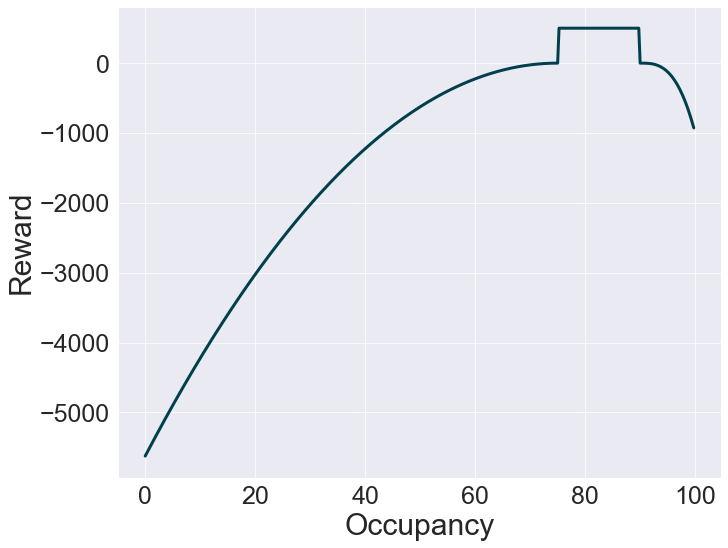

In [111]:
plot_reward_function(old_reward)

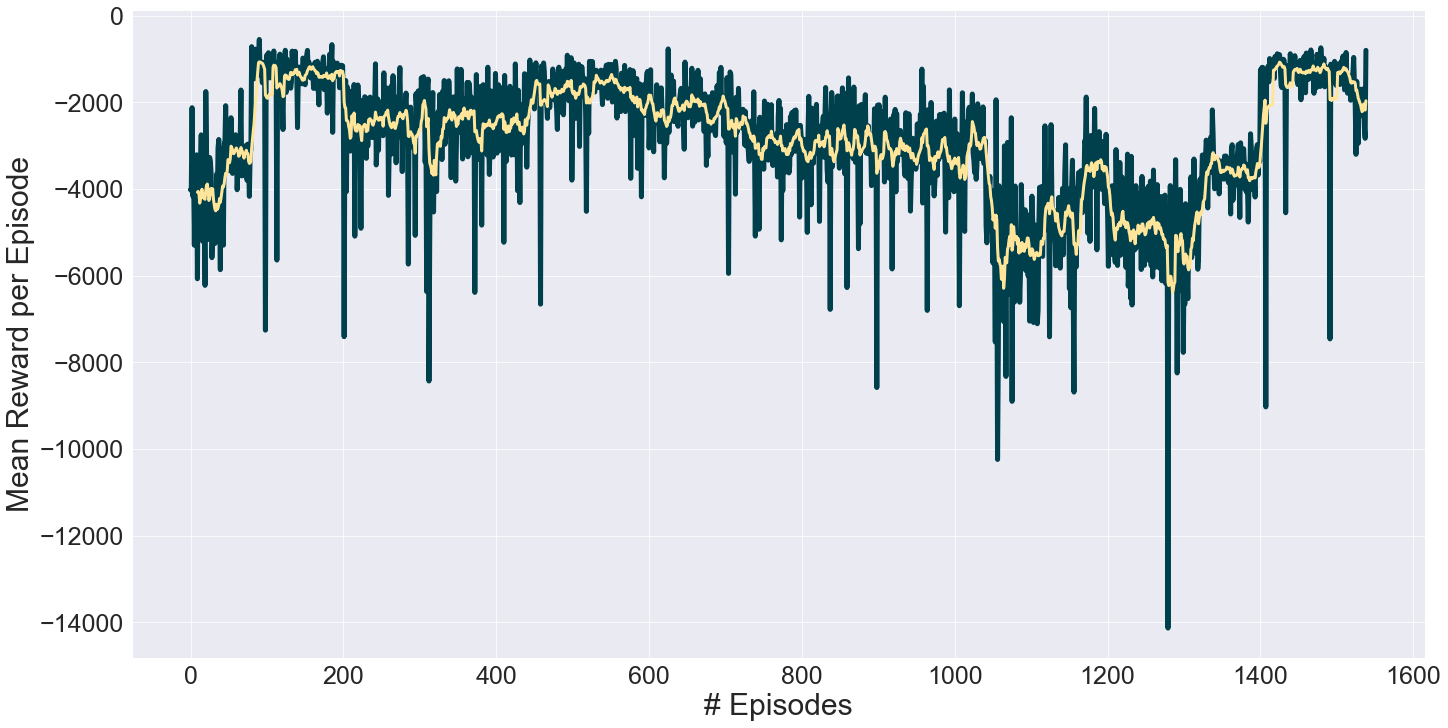

In [112]:
plot_results('result_old_long.csv')

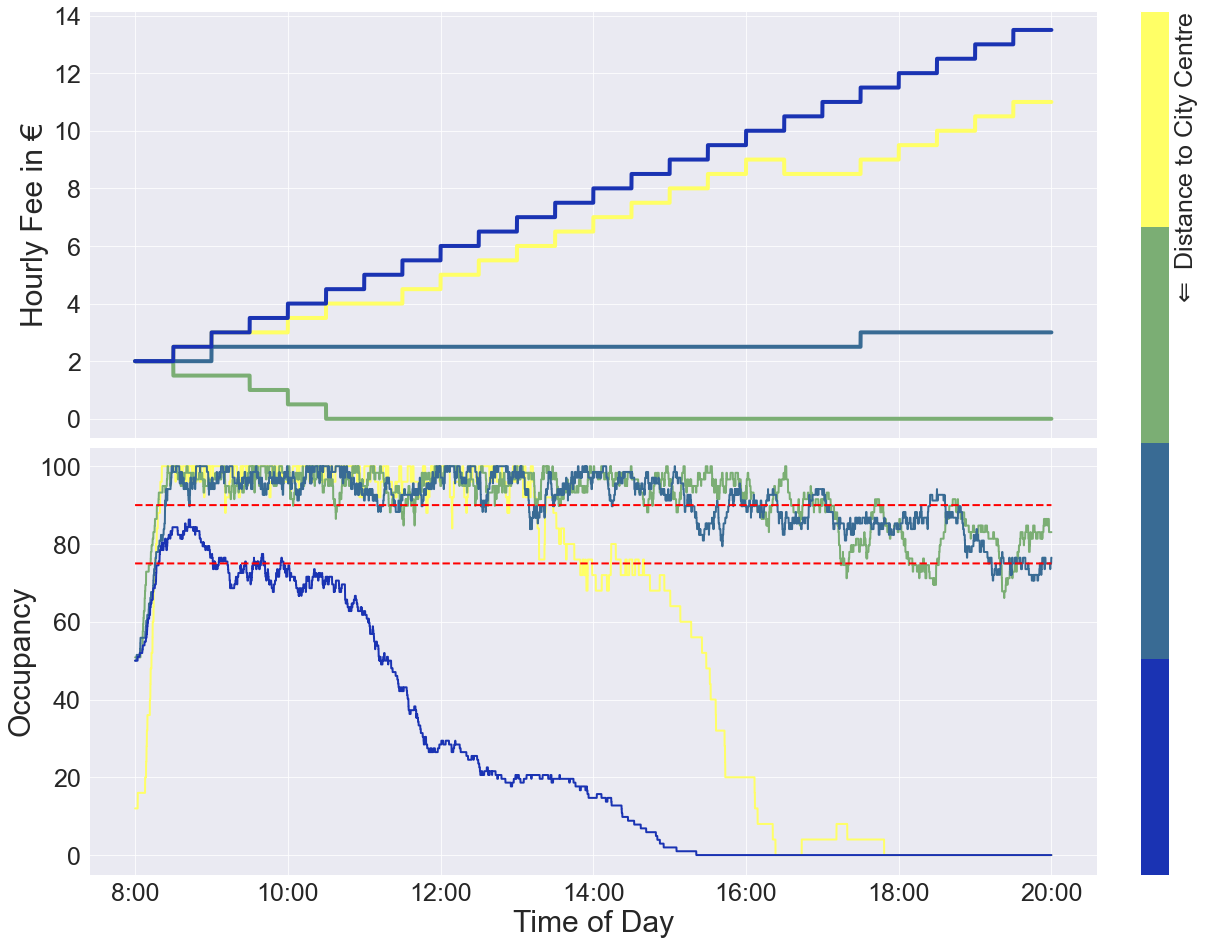

In [129]:
get_and_plot('old_E3.csv')

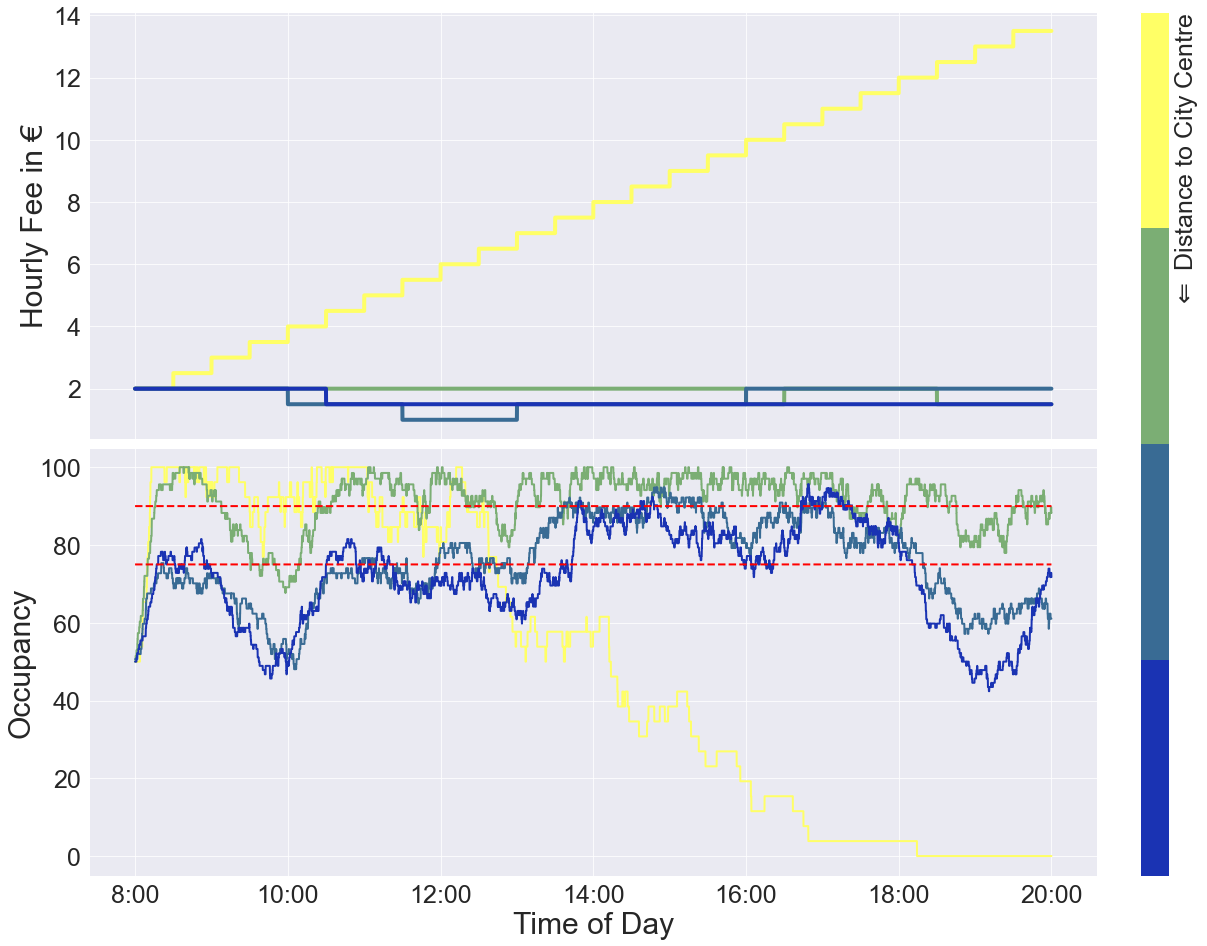

In [130]:
get_and_plot('old_E1518.csv')

## Shaped Reward

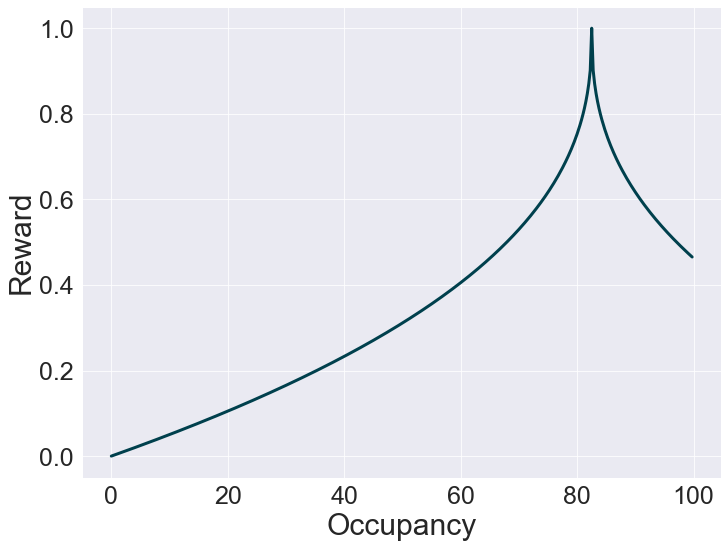

In [131]:
plot_reward_function(shaped_reward)

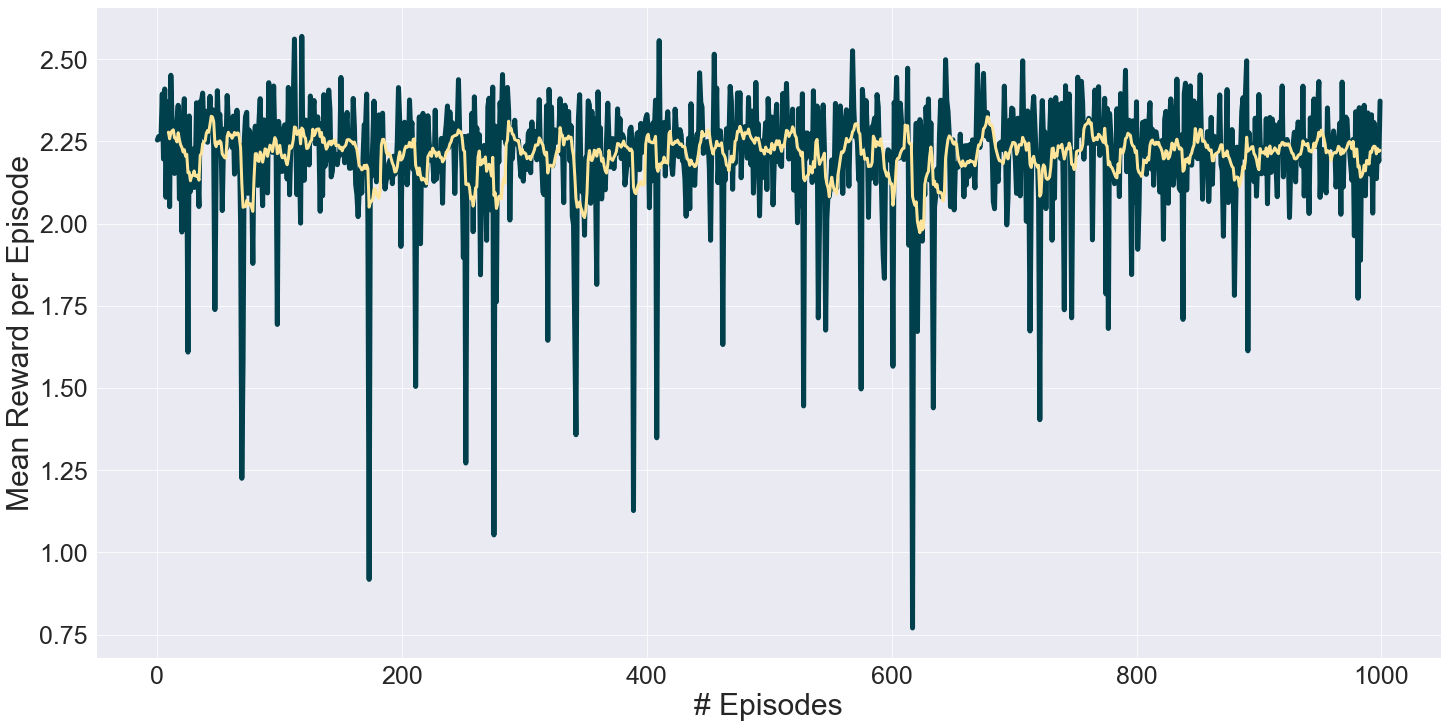

In [132]:
plot_results('result_tuned_shaped.csv')

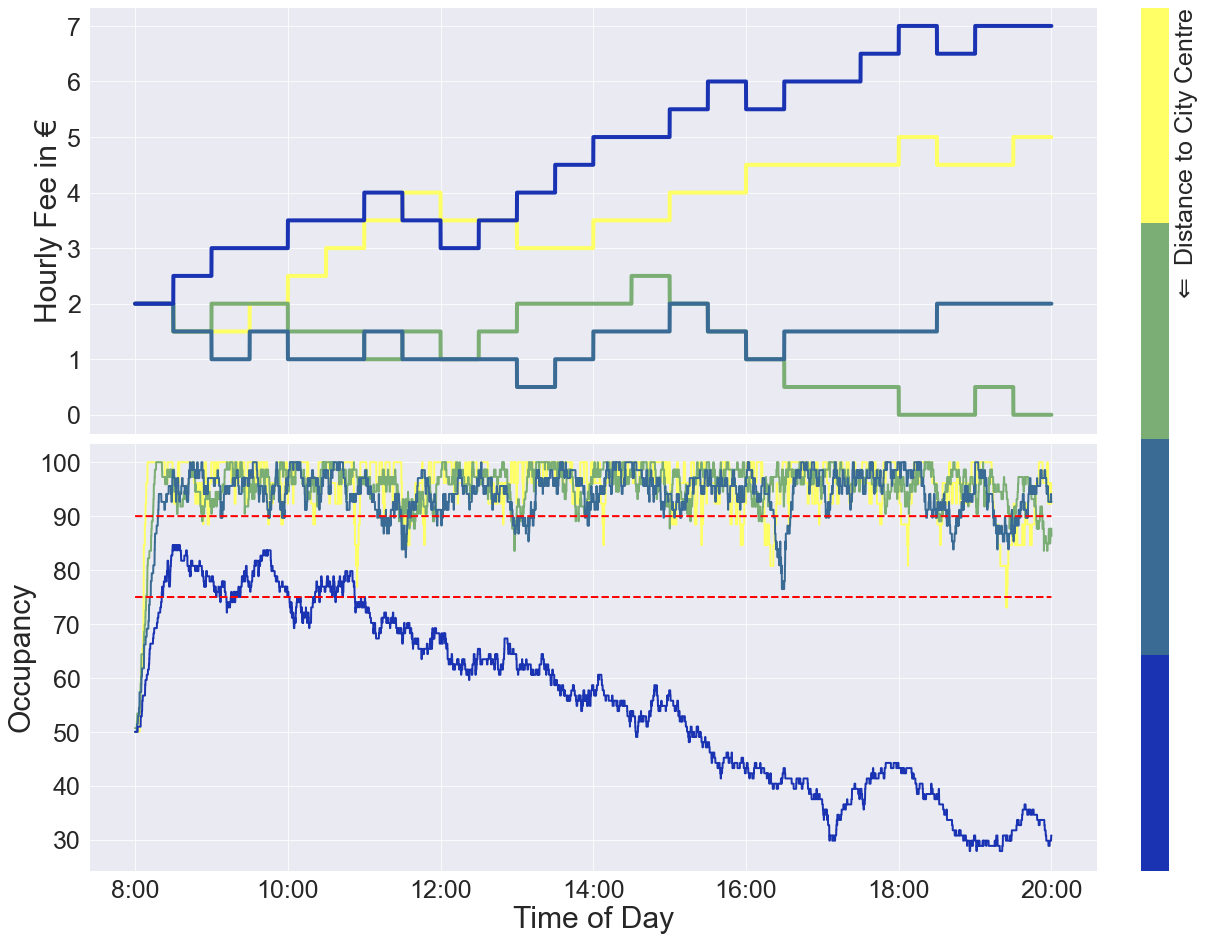

In [133]:
get_and_plot("shaped_tuned_E1.csv")

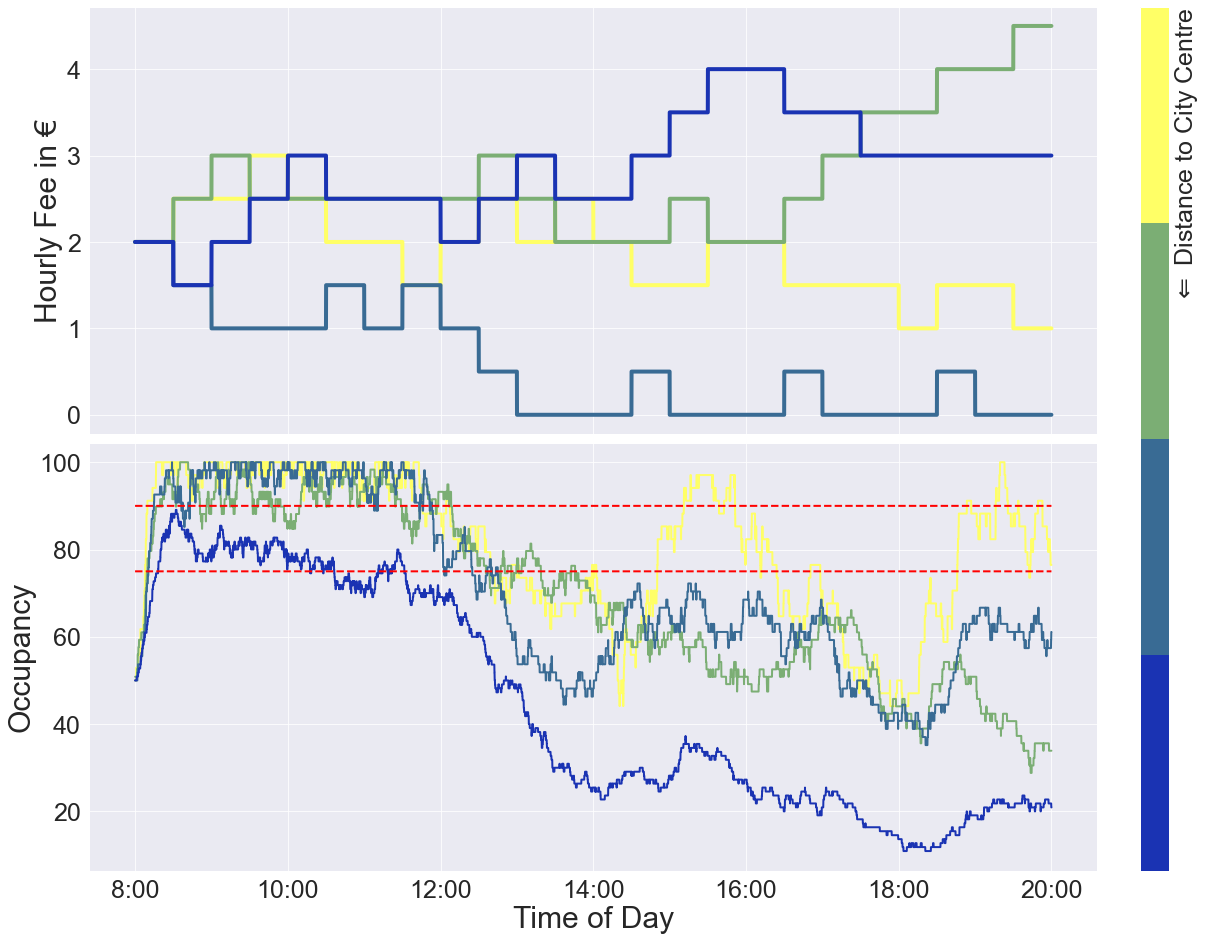

In [134]:
get_and_plot("shaped_tuned_E995.csv")

## Simple Reward

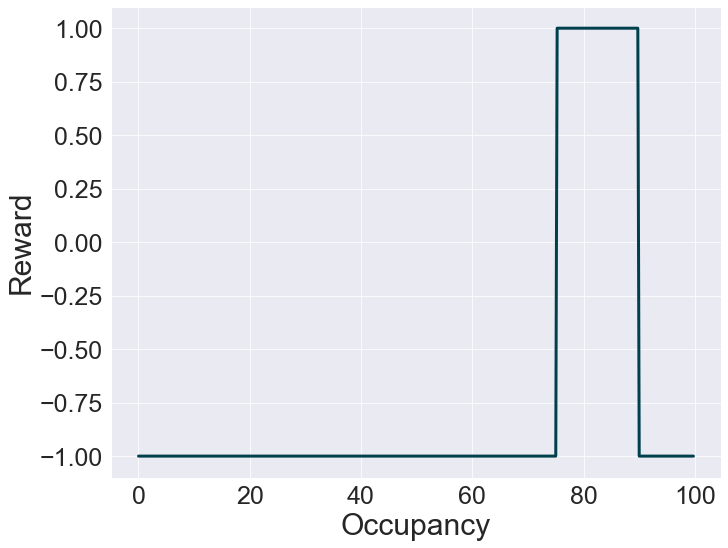

In [135]:
plot_reward_function(simple_reward)

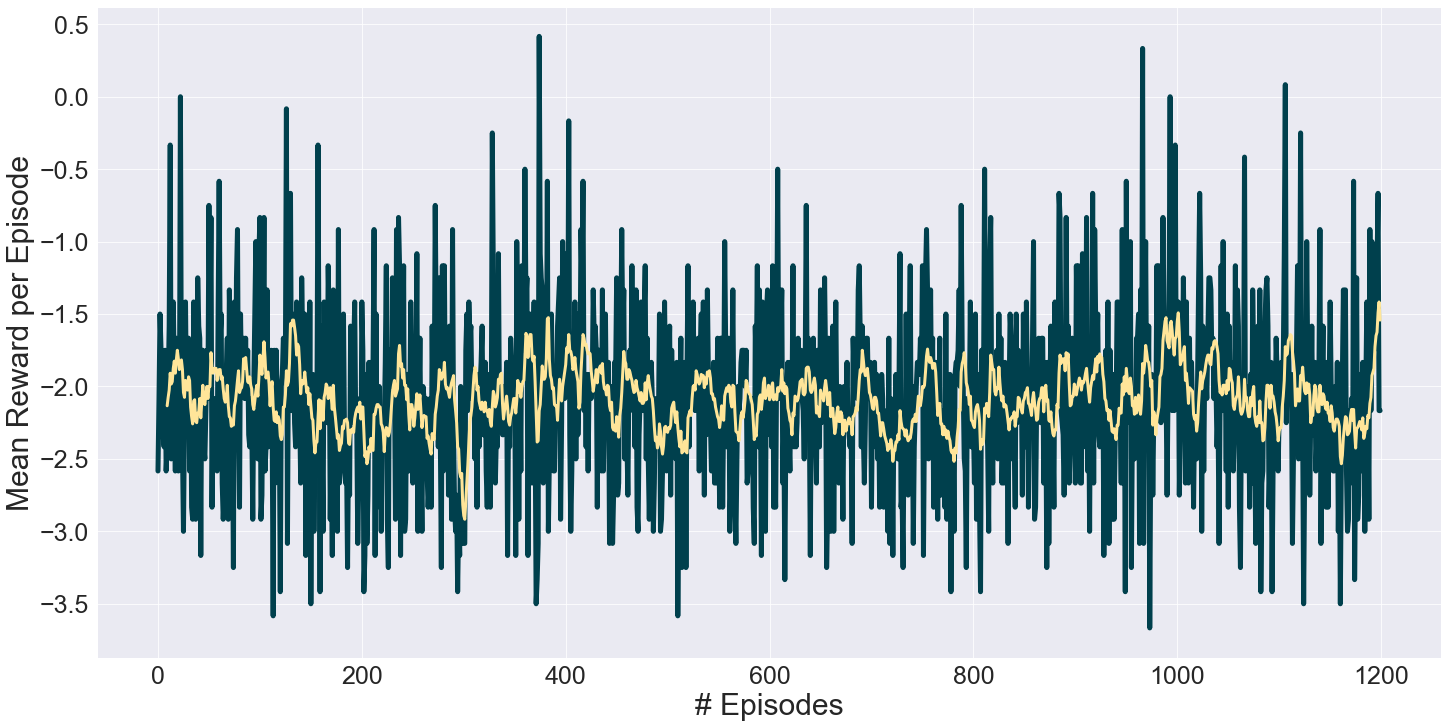

In [136]:
plot_results('result_simple_long.csv')

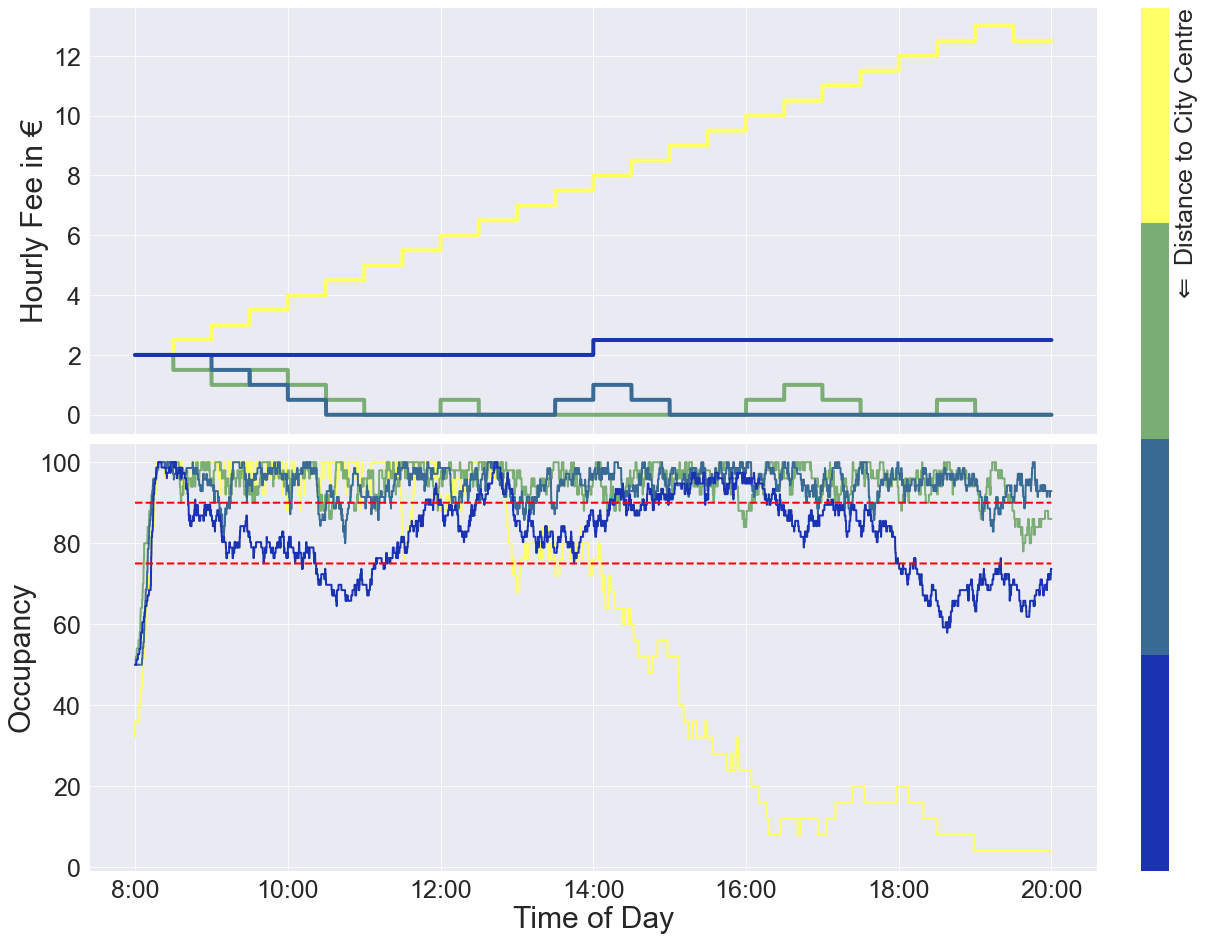

In [137]:
get_and_plot("simple_E1.csv")

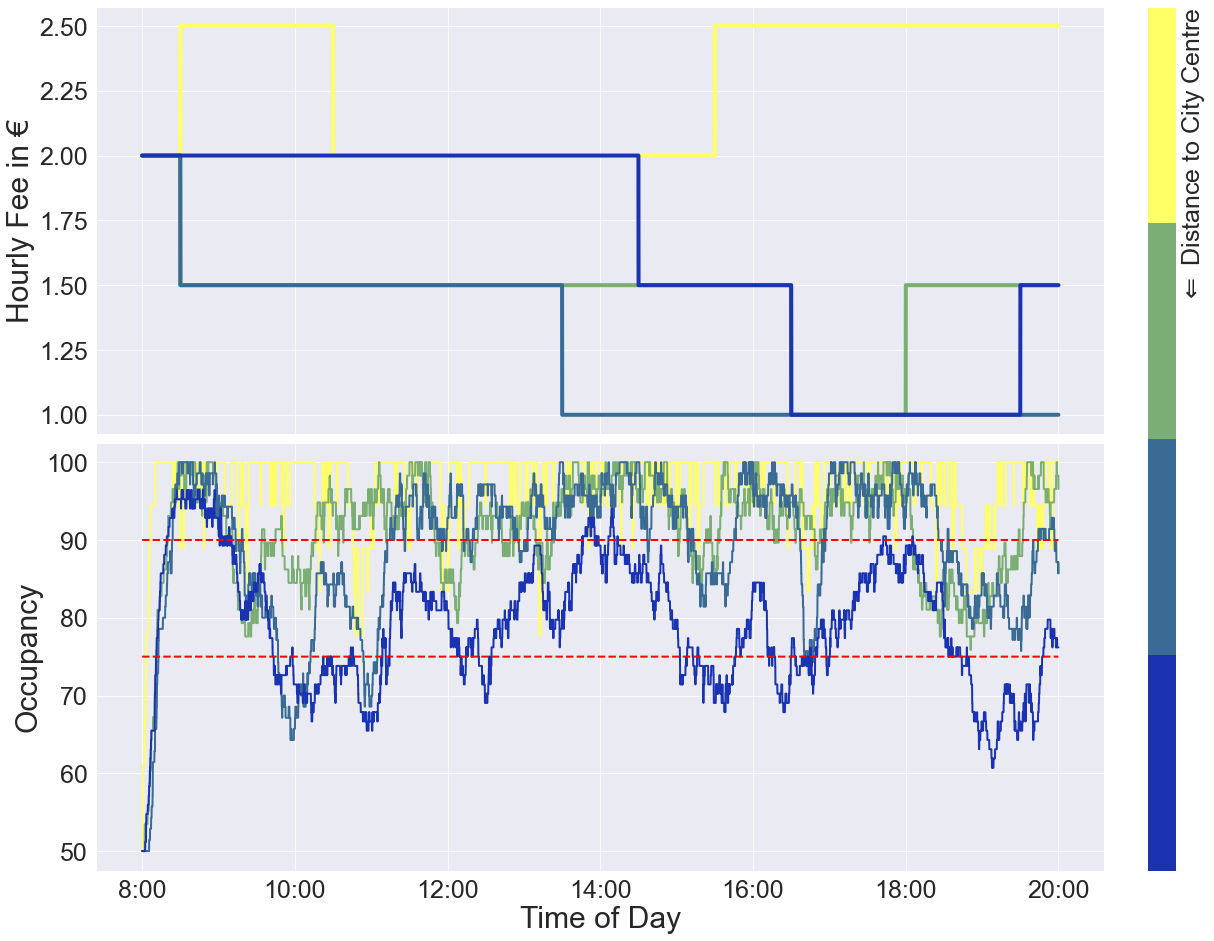

In [138]:
get_and_plot("simple_E1193.csv")

# Free

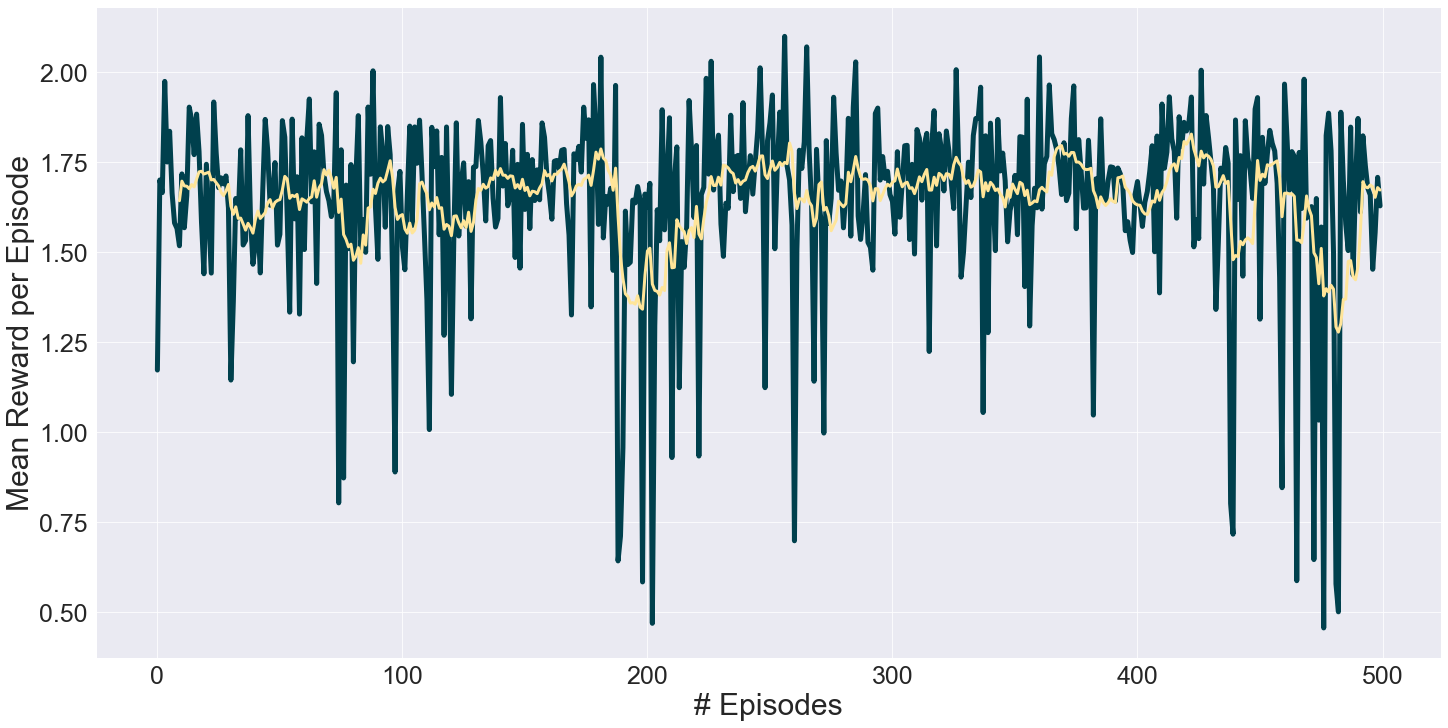

In [139]:
plot_results('result_free.csv')

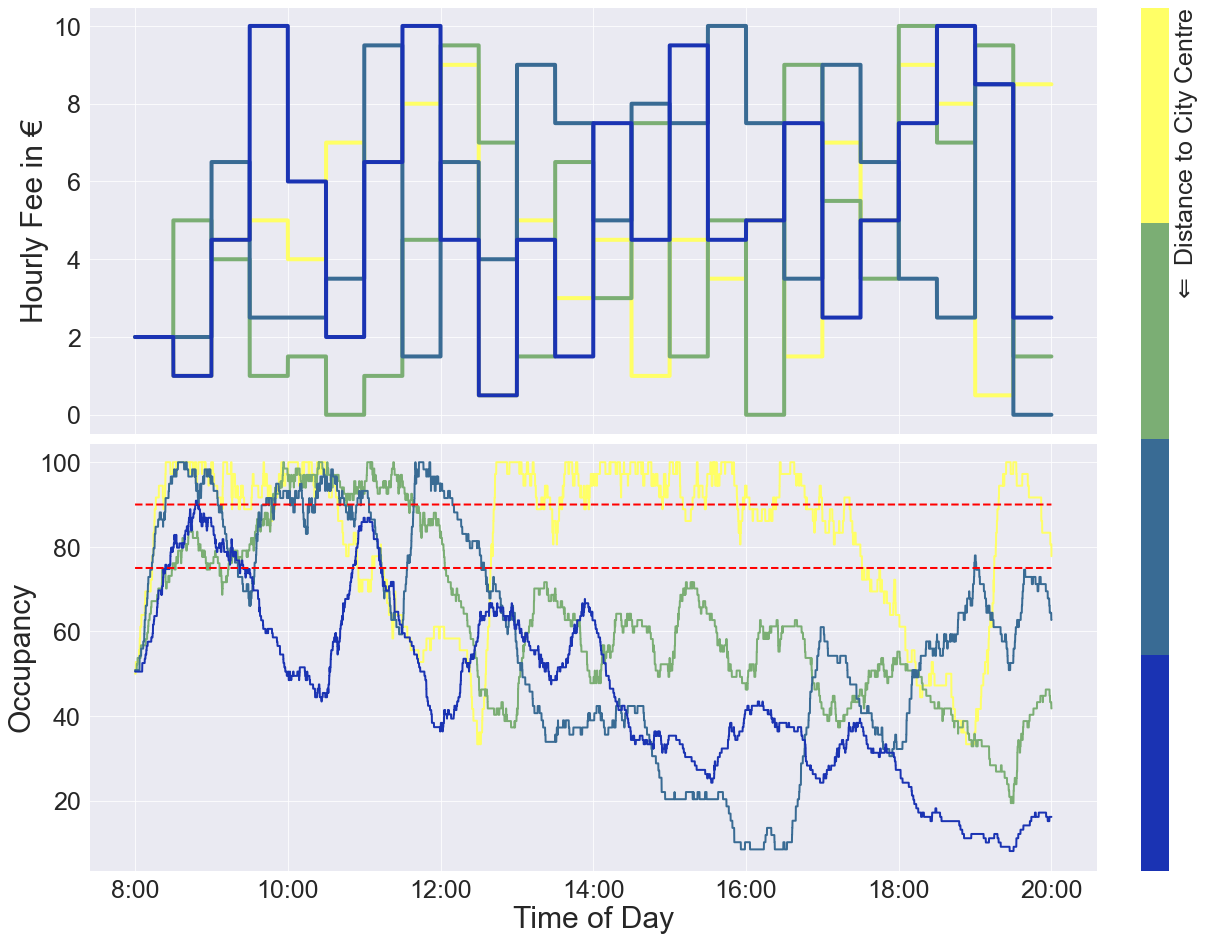

In [140]:
get_and_plot("E1_free.csv")

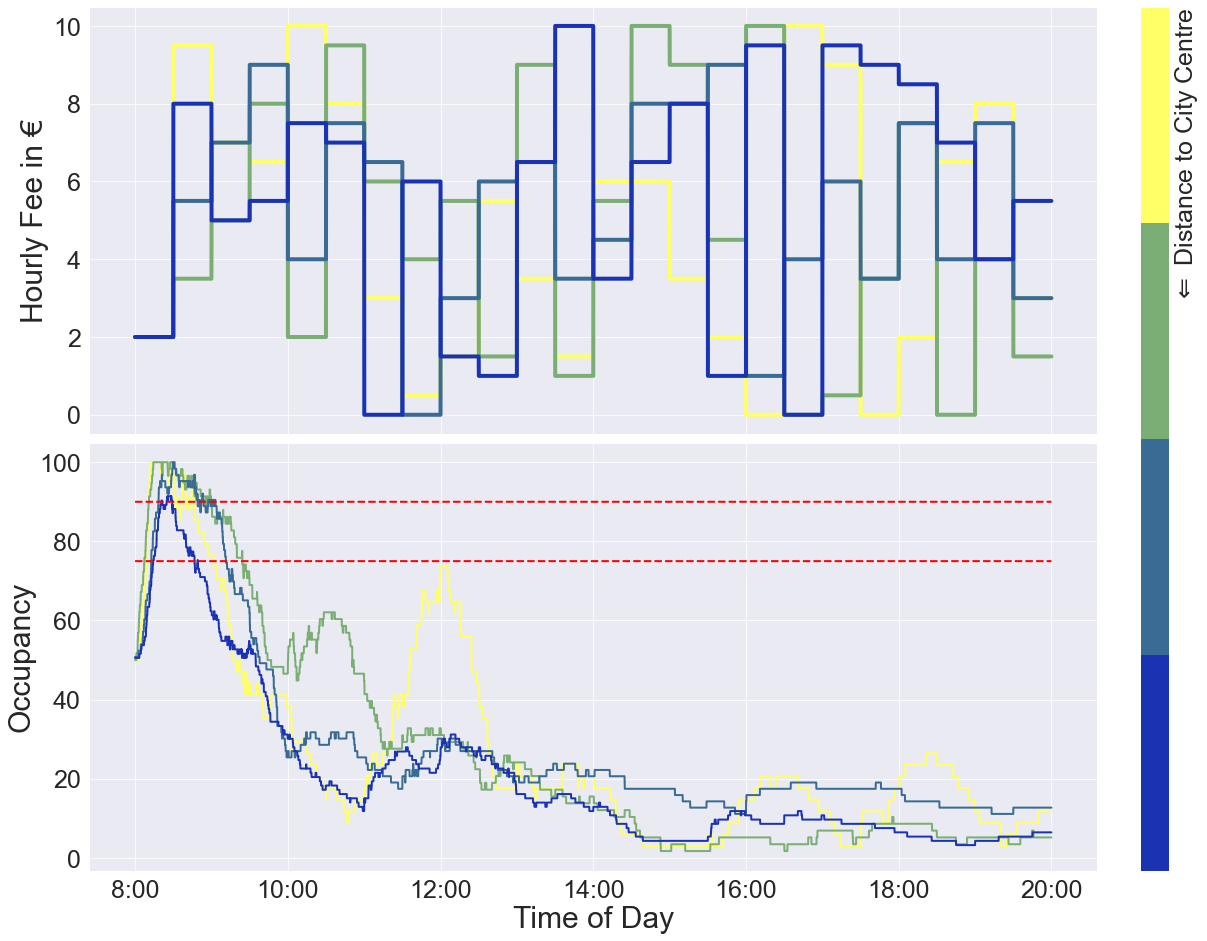

In [141]:
get_and_plot("E484_free.csv")

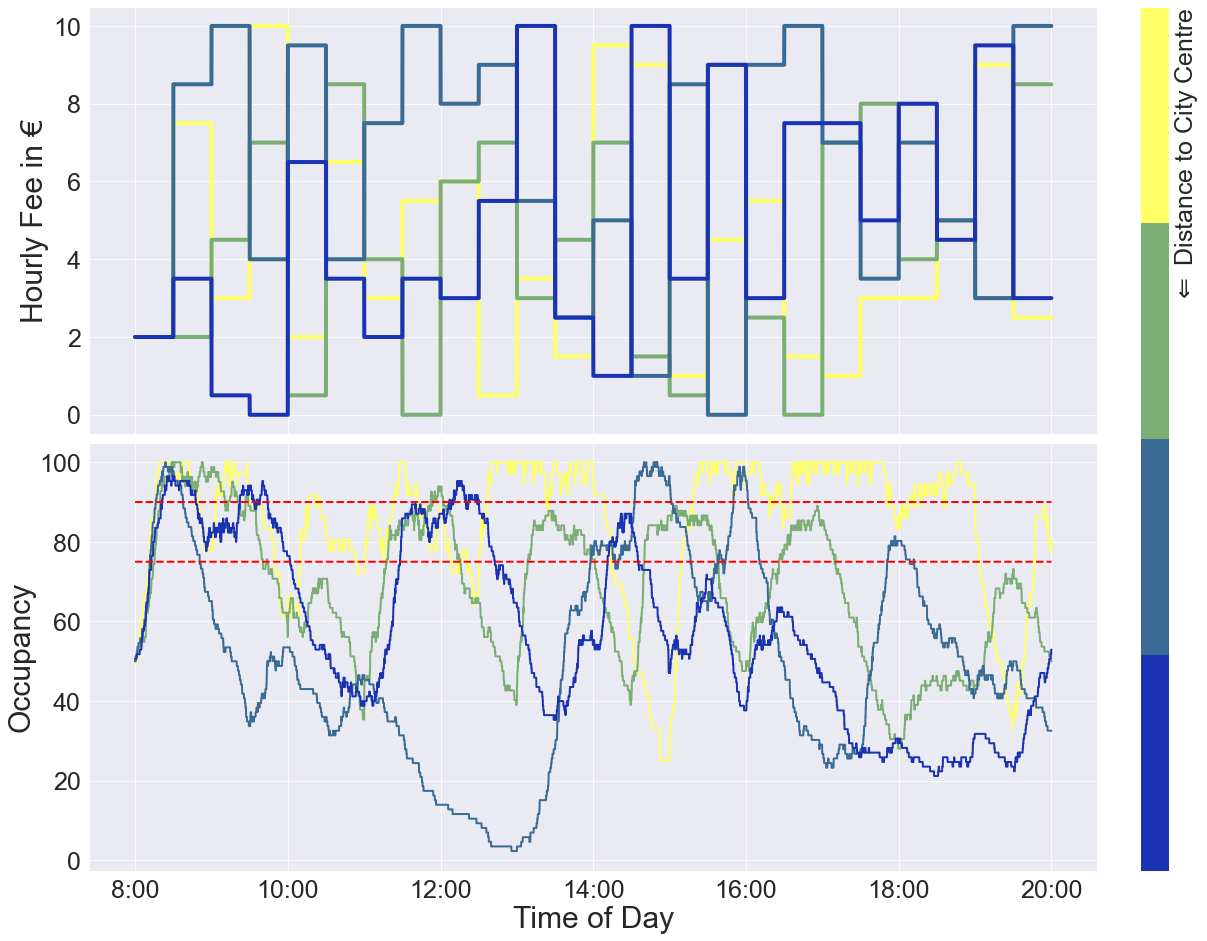

In [142]:
get_and_plot("E11_133.98.csv")

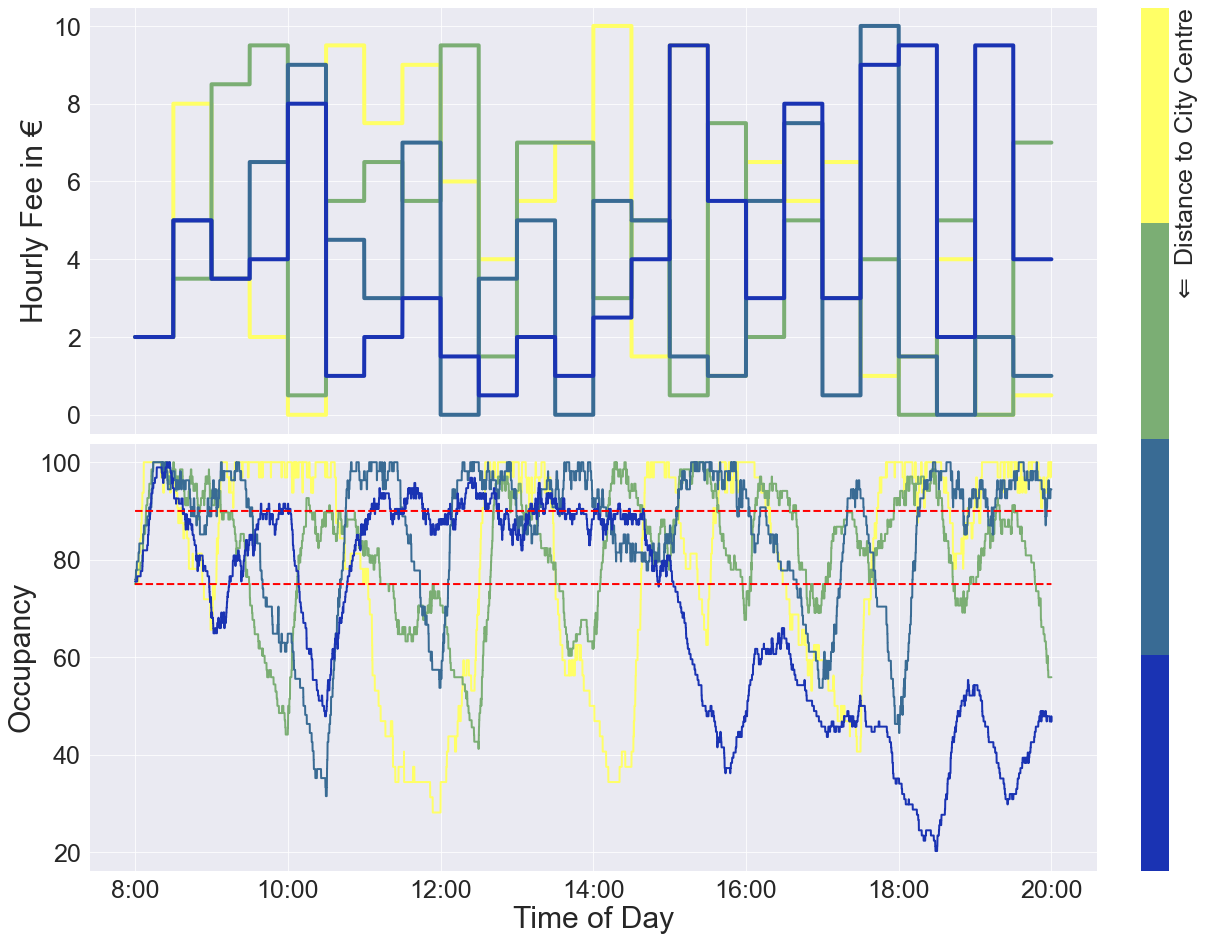

In [143]:
get_and_plot("E333_14.43_overall.csv")

In [144]:
start_i = 0
end_i = 0
episode_path = "new_world.csv"
with open(episode_path, newline='') as csvfile:
        file_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for i, row in enumerate(file_reader):
            if 'TURTLES' in row:
                start_i = i
            elif 'PATCHES' in row:
                end_i = i

In [145]:
start_i
end_i

1385

In [31]:
new_turtle_df = pd.read_csv(episode_path, skiprows=start_i + 1, nrows= end_i - start_i - 3)


In [32]:
new_turtle_df = new_turtle_df[new_turtle_df.wtp.notnull()]
new_turtle_df["park-time"] = new_turtle_df["park-time"] / 30

In [33]:
start_i = 0
end_i = 0
episode_path = "old_model.csv"
with open(episode_path, newline='') as csvfile:
        file_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
        for i, row in enumerate(file_reader):
            if 'TURTLES' in row:
                start_i = i
            elif 'PATCHES' in row:
                end_i = i

In [34]:
old_turtle_df = pd.read_csv(episode_path, skiprows=start_i + 1, nrows= end_i - start_i - 3)
old_turtle_df = old_turtle_df[old_turtle_df.wtp.notnull()]
old_turtle_df["park-time"] = old_turtle_df["park-time"] / 10

In [85]:
import matplotlib
matplotlib.rcParams.update({'font.size': 60})


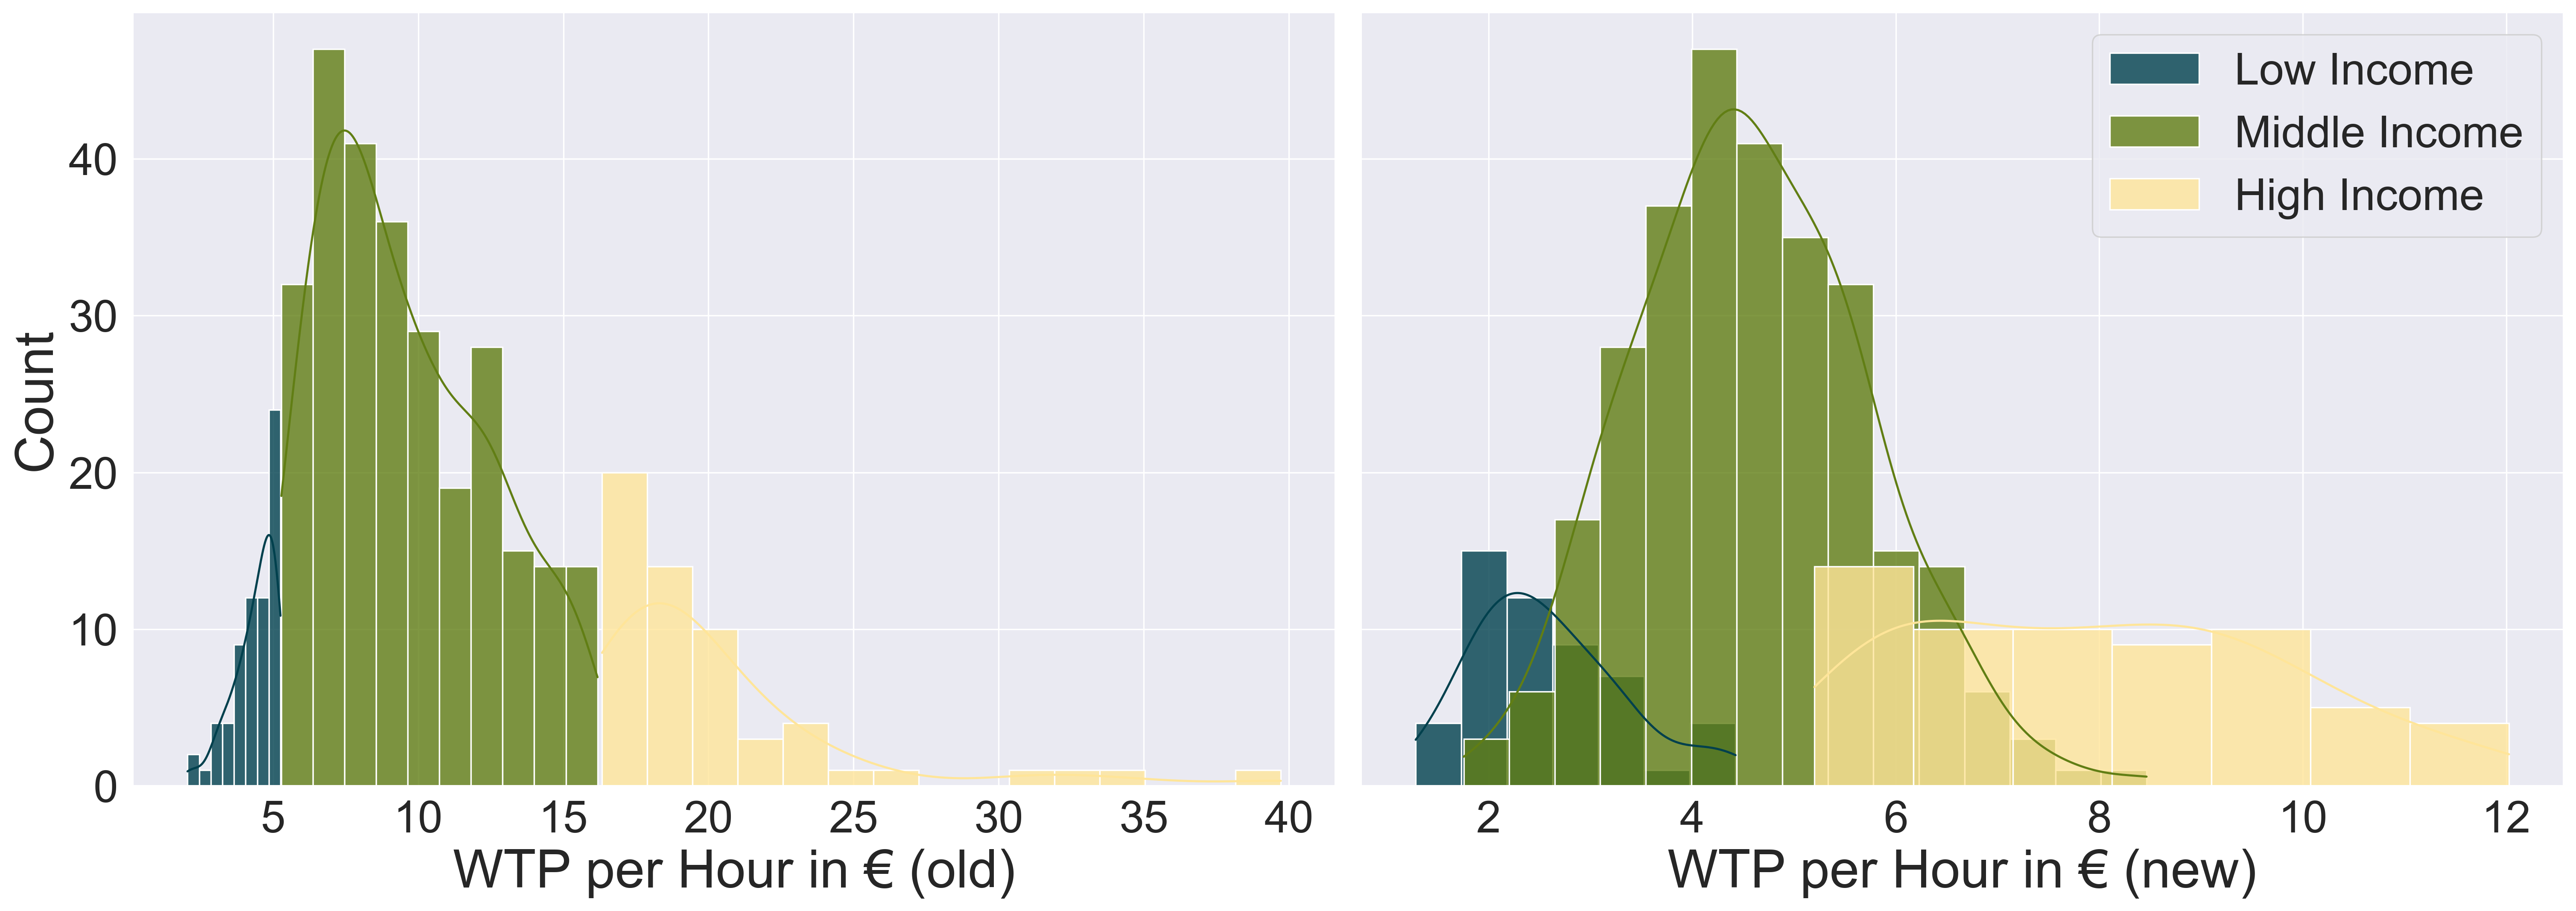

In [36]:
sns.set_style("darkgrid")

# Plot
kwargs = {'alpha':.8}


fig, axs = plt.subplots(1, 2, figsize=(20,7), dpi= 300, constrained_layout=True, sharey=True)

sns.histplot(data=old_turtle_df.loc[old_turtle_df['income-grade']=='"3"'], x='wtp', color=cm.bamako(0), label="Low Income", kde=True, **kwargs, ax=axs[0])
sns.histplot(data=old_turtle_df.loc[old_turtle_df['income-grade']=='"2"'], x='wtp', color=cm.bamako(0.5), label="Middle Income", kde=True, **kwargs, ax=axs[0])
sns.histplot(data=old_turtle_df.loc[old_turtle_df['income-grade']=='"1"'], x='wtp', color=cm.bamako(1.0), label="High Income", kde=True,**kwargs, ax=axs[0])

sns.histplot(data=new_turtle_df.loc[new_turtle_df['income-grade']==0], x='wtp', color=cm.bamako(0), label="Low Income", kde=True, **kwargs, ax=axs[1])
sns.histplot(data=new_turtle_df.loc[new_turtle_df['income-grade']==1], x='wtp', color=cm.bamako(0.5), label="Middle Income", kde=True, **kwargs, ax=axs[1])
sns.histplot(data=new_turtle_df.loc[new_turtle_df['income-grade']==2], x='wtp', color=cm.bamako(1.0), label="High Income", kde=True,**kwargs, ax=axs[1])


#sns.distplot(x1, color="#e6194B", label="Low Income", **kwargs)
#sns.distplot(x2, color="#4363d8", label="Middle Income", **kwargs)
#sns.distplot(x3, color="#a9a9a9", label="High Income", **kwargs)
#plt.xlim(50,75)

old_new = ["old", "new"]
for i in [0,1]:
    axs[i].set_xlabel(f"WTP per Hour in € ({old_new[i]})", fontsize=30)
    axs[i].tick_params(axis='both', labelsize=25) 

axs[0].set_ylabel("Count", fontsize=30)

plt.legend(fontsize=25)
plt.savefig('wtp_distro_together.png')
# constrain layout

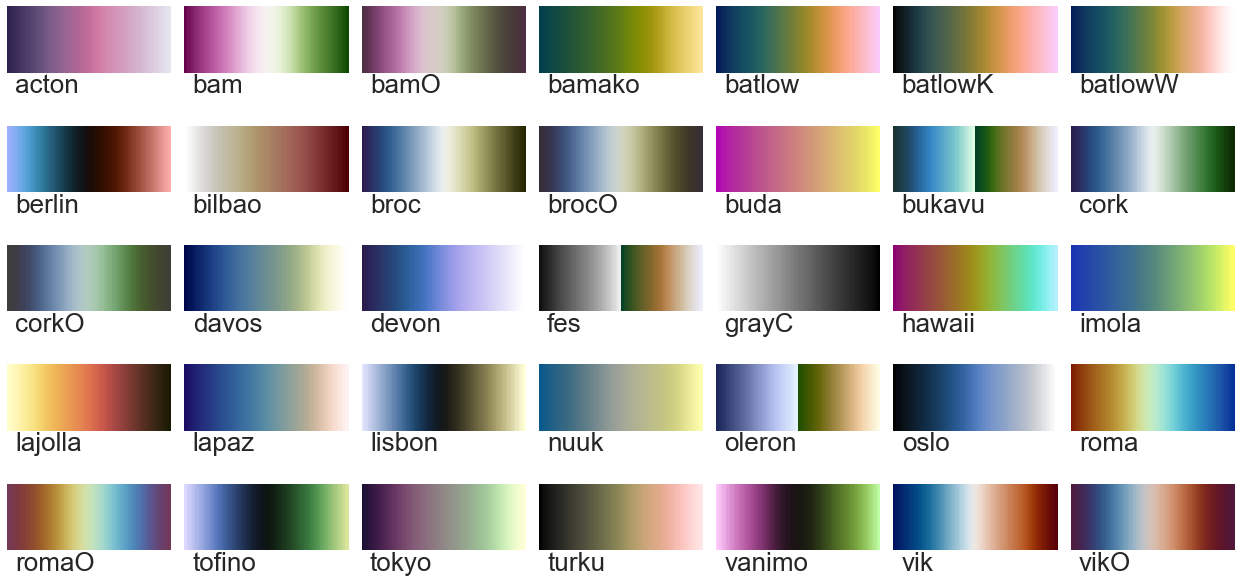

In [15]:
from cmcrameri.cm import show_cmaps 
show_cmaps()


In [65]:
x1

Series([], Name: wtp, dtype: float64)

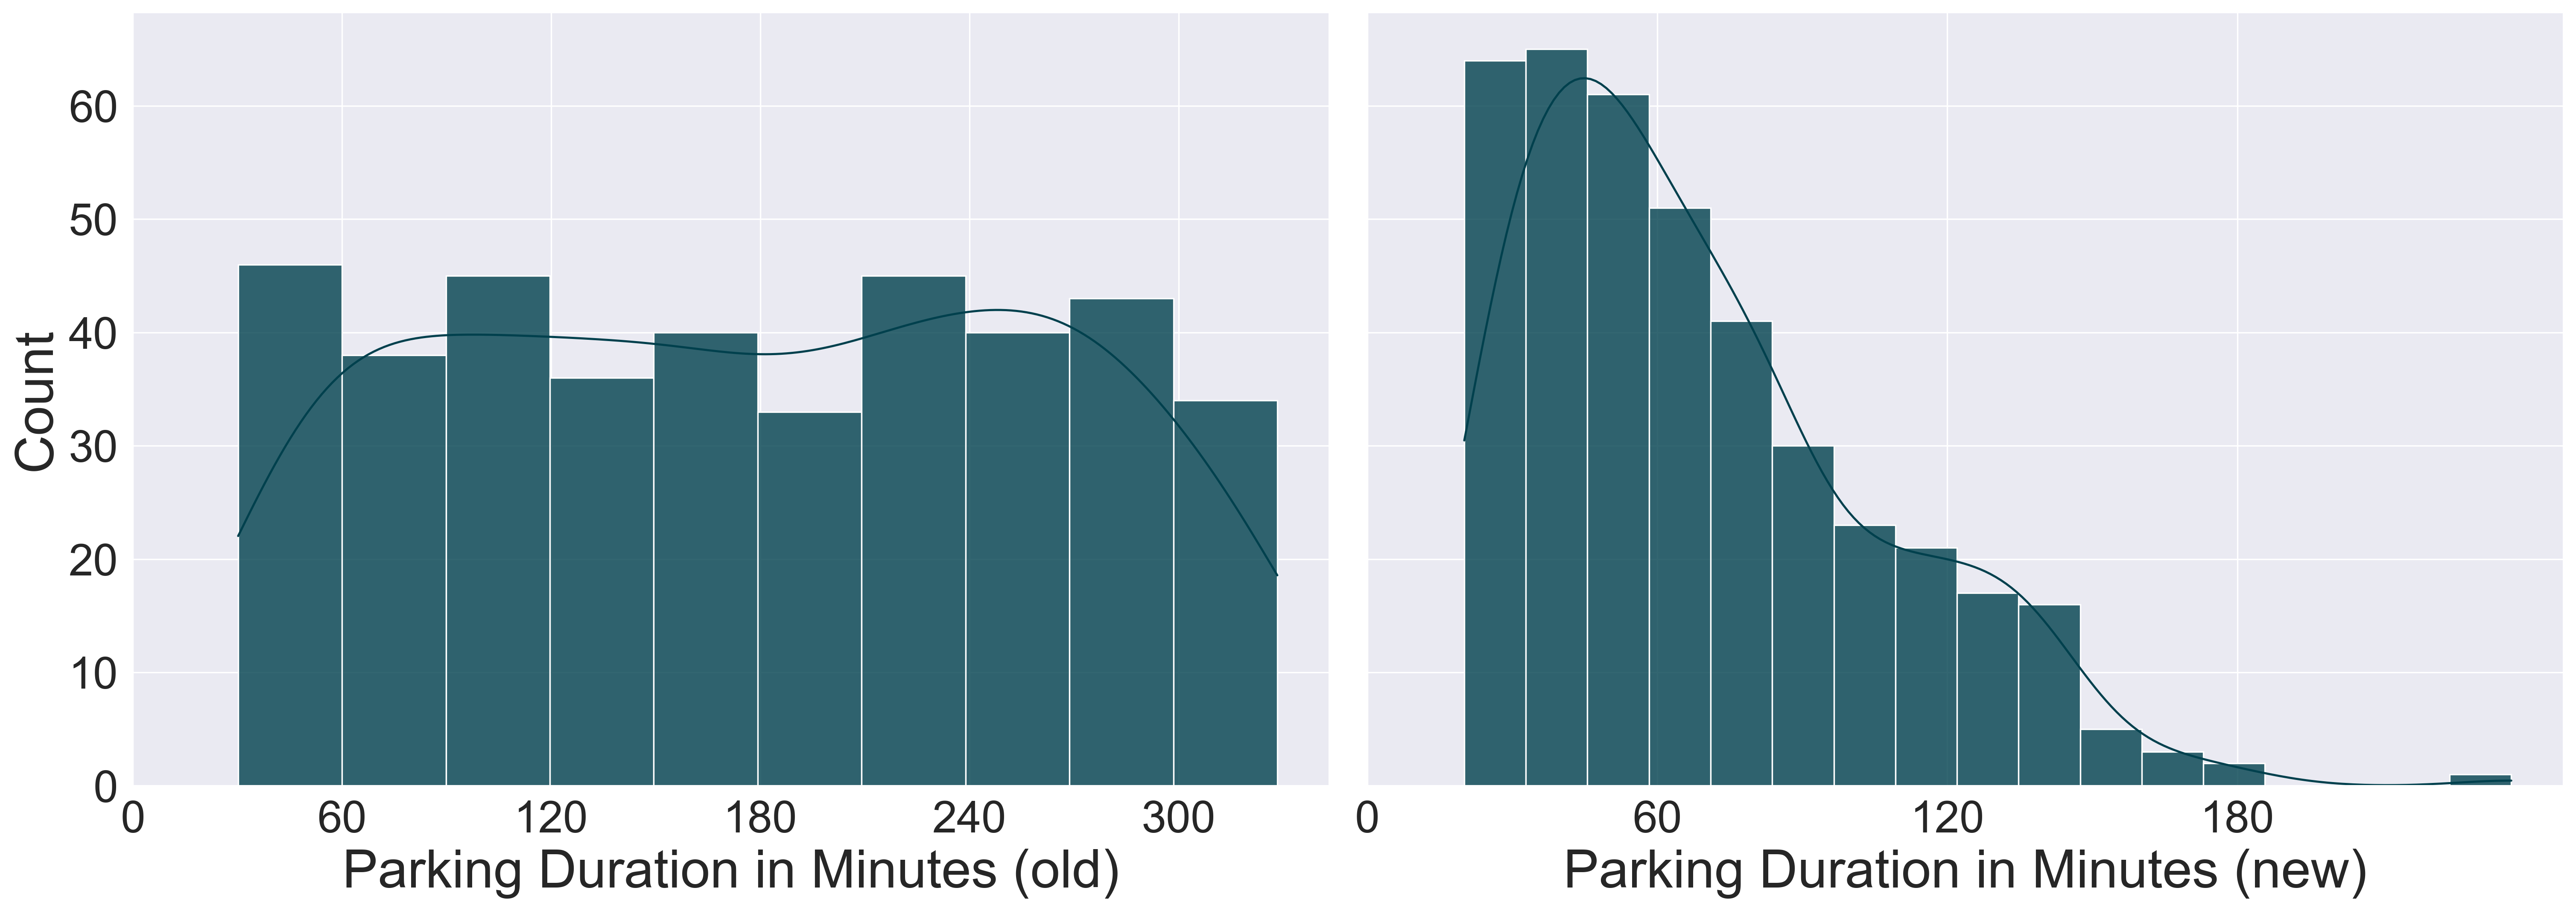

In [38]:
sns.set_style("darkgrid")



# Plot
kwargs = {'alpha':.8}

fig, axs = plt.subplots(1, 2, figsize=(20,7), dpi= 300, constrained_layout=True, sharey=True)

sns.histplot(data=old_turtle_df, x="park-time", color=cm.bamako(0), kde=True, ax=axs[0], alpha=.8)

sns.histplot(data=new_turtle_df, x="park-time", color=cm.bamako(0), kde=True, ax=axs[1], alpha=.8)

#plt.xlim(50,75)
old_new = ["old", "new"]
for i in [0,1]:
    axs[i].set_xlabel(f"Parking Duration in Minutes ({old_new[i]})", fontsize=30)
    axs[i].tick_params(axis='both', labelsize=25) 

axs[0].set_ylabel("Count", fontsize=30)

axs[0].set_xticks(np.arange(0, max(old_turtle_df["park-time"])+1, 60))
axs[1].set_xticks(np.arange(0, max(new_turtle_df["park-time"])+1, 60))


plt.savefig('parking_duration_together.png', dpi=300)

In [278]:
 color_list = [cm.imola_r(0), cm.imola_r(1.0 * 1/3), cm.imola_r(1.0 * 2/3), cm.imola_r(1.0)]


In [279]:
color_list

[(1.0, 0.999989, 0.400094, 1.0),
 (0.482064, 0.680831, 0.455471, 1.0),
 (0.224273, 0.418485, 0.579507, 1.0),
 (0.101441, 0.20011, 0.700194, 1.0)]

In [273]:
for c in color_list:
    data = [hue * 255 for hue in c[:3]]
    print(str(data).replace(",", ""))
    print("")

[255.0 254.997195 102.02397]

[144.63498 195.39374999999998 110.74803]

[83.061405 133.38412499999998 127.22001]

[47.70438 93.24534 157.185315]

[25.867455 51.02805 178.54946999999999]



In [14]:
def minimize_reward(x):
    """
    """
    return (abs(x-400)/300)

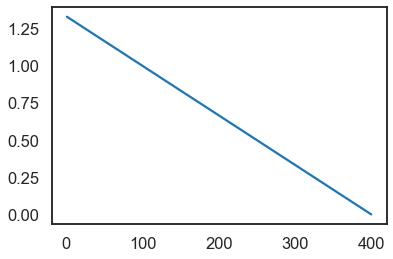

In [15]:
plot_reward_function(minimize_reward, 1, 400)

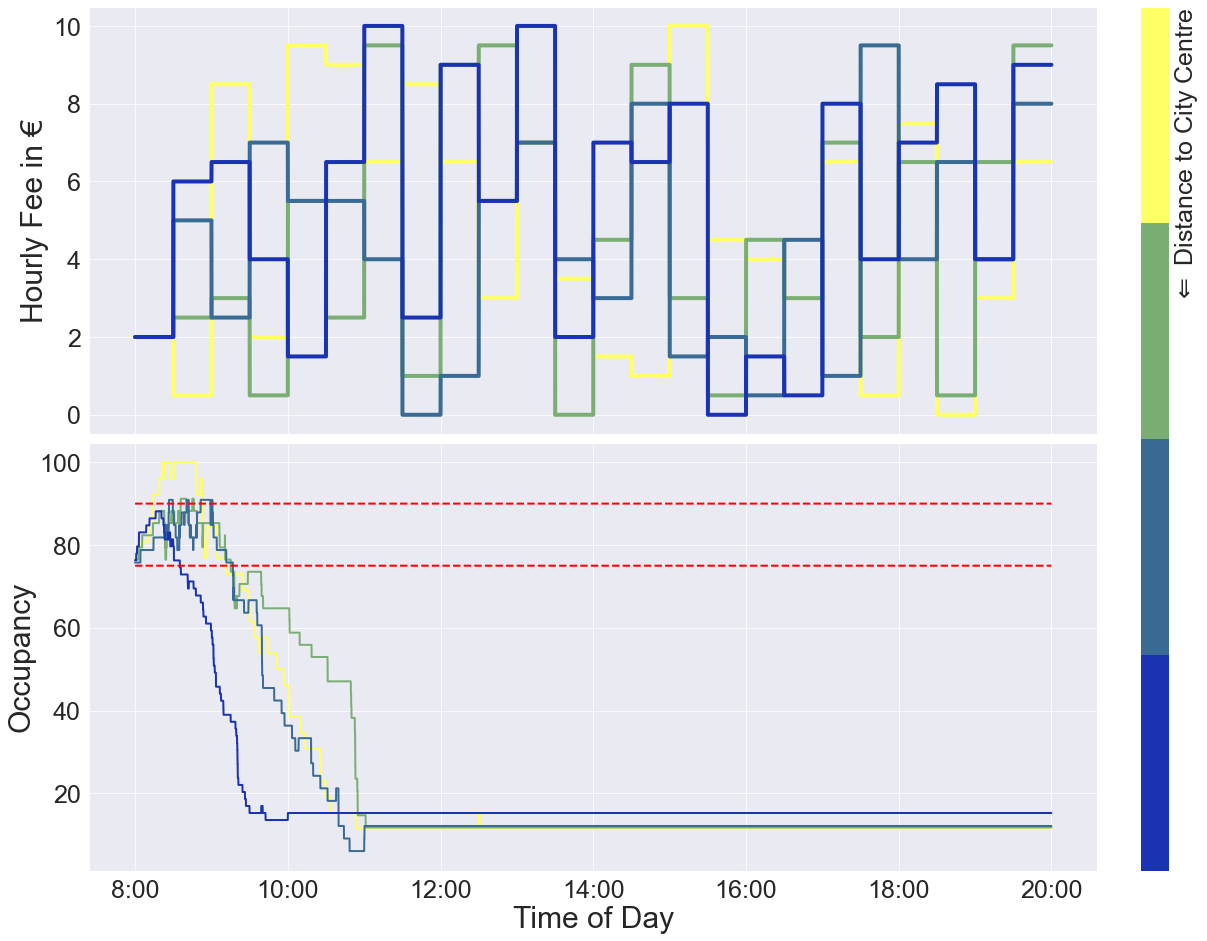

In [10]:
get_and_plot("E1851_0.0.csv")